# Preamble

To use apecemathpy we can consider two ways, symbolic and numeric definitions of Higgs couplings. To do symbolic calculations we should use [sympy](https://www.sympy.org/en/index.html) library, for example we can use any funtion from sympy using the next one lines of commands:

In [1]:
import sympy as sp #import sympy
sp.init_printing() # pretty latex printer activation
sp.sqrt(4)

where we have used square root function of sympy library. Also we can work with symbolic variables with

In [2]:
xsym = sp.symbols('x')
sp.sqrt(xsym)

To numeric function we choose [numpy](https://numpy.org/) library, then, we can use square root of numpy library as follow

In [3]:
import numpy as np #import numpy
np.sqrt(4.0)

the main advantage of numpy is that work in a vectorial way, 

In [4]:
xnp = np.array([4.0,9.0,16.0])
np.sqrt(xnp)

array([2., 3., 4.])

in the example above the square root have been calculated over each component of `xnp` `np.array`. In principle, to work with spacemathpy we only need define a numeric version of our Higgs couplings, but if we can see our expressions is convenient to also define the symbolic version. To define both kinds of function, we do use `issymbolic` function defined in spacemathpy, which return `True` if someone of its arguments are sympy symbols(instances of `sp.symbols` function) or `False` otherwise. The next one is a example of this approach

In [5]:
from spacemathpy import * #import all functions of spacemathpy

In [6]:
def square_root(x):
    if issymbolic(x):
        return sp.sqrt(x)
    else:
        return np.sqrt(x)


The above function works well with numeric and symbolic approaches, for example

In [7]:
square_root(xsym)

In [8]:
square_root(xnp)

array([2., 3., 4.])

As final comment, spacemathpy have some global variables predefined, for example masses to $t$,$b$, $\tau$, $W$ and $Z$ particles are defined as a python dictionary as we can see in the next example

In [9]:
mW

{'value': 80.379, 'units': 'GeV', 'symbol': m_W}

so, if we need a numeric value we use

In [10]:
mW['value']

for symbolic representation we use

In [11]:
mW['symbol']

Also, constants like $g$ and $v$ (SM vev) are given by `g` and `SMvev` as we see above

In [12]:
g

{'value': 0.6534878048780488, 'unit': None, 'symbol': g}

In [13]:
SMvev

{'value': 246, 'units': 'GeV', 'symbol': v}

For a correct implementation of Higgs couplings we need use the predifined masses and constants.

# 2HDM

## Higgs couplings with fermions
In the context of 2HDM-III, the couplings $g_{htt}$, $g_{hbb}$, $g_{h\tau\tau}$ can be extracted of:

$$\mathcal{L}_Y^{hqq} = \frac{g}{2}\left(\frac{m_{d_{m}}}{m_{W}}\right) d_{m}\left[-\frac{\operatorname{sen} \alpha}{\cos \beta} \delta_{m n}+\frac{\sqrt{2} \cos (\alpha-\beta)}{g \cos \beta}\left(\frac{m_{W}}{m_{d_{m}}}\right)\left(\tilde{Y}_{2}^{d}\right)_{m n}\right] d_{n} h^{0}$$
$$+\frac{g}{2}\left(\frac{m_{u_{m}}}{m_{W}}\right) \bar{u}_{m}\left[\frac{\cos \alpha}{\operatorname{sen} \beta} \delta_{m n}-\frac{\sqrt{2} \cos (\alpha-\beta)}{g \operatorname{sen} \beta}\left(\frac{m_{W}}{m_{u_{m}}}\right)\left(\bar{Y}_{1}^{u}\right)_{m n}\right] u_{n} h^{0}$$

In python these couplings can be defined as functions $\alpha$, $\tan{\beta}$ and $C_{\alpha \beta} = \cos{(\alpha - \beta)}$. 

In [14]:
#2HDM-I
a,tb = sp.symbols('alpha,t_b')
def ghtt_2hdmI(α,tb):
    global mW,mt,g,SMvev
    if issymbolic(α,Cab,tb):
        MW,Mt= mW['symbol'],mt['symbol']
        return (g['symbol']/2)*(Mt/MW)*(sp.cos(α)/tb*sp.cos(sp.atan(tb)))
    else:
        MW,Mt= mW['value'],mt['value']
        return (g['value']/2)*(Mt/MW)*(np.cos(α)/tb*np.cos(np.arctan(tb)))


def ghbb_2hdmI(α,tb):
    global mW,mb,g,SMvev
    if issymbolic(α,tb):
        MW,Mb= mW['symbol'],mb['symbol']
        return (g['symbol']/2)*(Mb/MW)*(sp.cos(α)/tb*sp.cos(sp.atan(tb)))
    else:
        MW,Mb= mW['value'],mb['value']
        return (g['value']/2)*(Mb/MW)*(np.cos(α)/tb*np.cos(np.arctan(tb)))
ghbb_2hdmI(a,tb)    
    
def ghtautau_2hdmI(α,tb):
    global mW,mta,g,SMvev
    if issymbolic(α,tb):
        MW,Mtau= mW['symbol'],mta['symbol']
        return (g['symbol']/2)*(Mtau/MW)*(sp.cos(α)/tb*sp.cos(sp.atan(tb)))
    else:
        MW,Mtau= mW['value'],mta['value']
        return (g['value']/2)*(Mtau/MW)*(np.cos(α)/tb*np.cos(np.arctan(tb)))
ghtautau_2hdmI(a,tb) 
def ghww_2hdmI(sab):
    global mW,g
    if issymbolic(sab):
        MW,gg= mW['symbol'],g['symbol']
        return gg*MW*sab
    else:
        MW,gg= mW['value'],g['value']
        return gg*MW*sab
     
        
def ghzz_2hdmI(sab):
    global mZ,g
    if issymbolic(sab):
        MZ,gg= mZ['symbol'],g['symbol']
        return gg*MZ*sab
    else:
        MZ,gg= mZ['value'],g['value']
        return gg*MZ*sab

## Initial parameter space

In [15]:
n = 1000000
Cab = np.random.uniform(-1.0,1.0,n)
tb = np.random.uniform(0.01,15.0,n)
mCH = np.random.uniform(200,1000,n)
parameters = {'Cab':Cab,'tb':tb}

## Allowed parameter space

We calculate the allowed parameter space to each signal

### $$R_{\tau}$$

In [16]:
data_rtau = Rtau.parameter_space_pandas([
         ghtt_2hdmI(-np.arccos(Cab) + np.arctan(tb),tb),
         ghbb_2hdmI(-np.arccos(Cab) + np.arctan(tb),tb),
         ghtautau_2hdmI(-np.arccos(Cab) + np.arctan(tb),tb)
],parameters)

/home/moises/miniconda3/lib/python3.7/site-packages/spacemathpy/RXX.py:41: RuntimeWarning: invalid value encountered in sqrt
  return -(1.0/4.0)*(np.log((1+np.sqrt(1-((4*mtop**2)/(mS**2)))))/(1-np.sqrt(1-((4*mtop**2)/(mS**2))))-1j*np.pi)**2;#MODIFICADO#(-sp.I*np.pi)
/home/moises/miniconda3/lib/python3.7/site-packages/spacemathpy/RXX.py:68: RuntimeWarning: invalid value encountered in arcsin
  return np.arcsin(np.sqrt((mS**2)/(4*mbot**2)))**2;


In [17]:
Rtau.func(ghtt_2hdmI(-np.arccos(Cab) + np.arctan(tb),tb),
         ghbb_2hdmI(-np.arccos(Cab) + np.arctan(tb),tb),
         ghtautau_2hdmI(-np.arccos(Cab) + np.arctan(tb),tb))

array([9.38029168e-10, 6.51829762e-09, 1.80564037e-01, ...,
       9.00635385e-09, 1.09891334e-09, 1.16092276e-01])

In [18]:
data_rtau['1s'];

In [19]:
latex_names = {'Cab':r'$\cos(\alpha -\beta)$',
        'tb':r'$\tan(\beta)$',
        'Att':r'$A_{tt}$','Abb':r'$A_{bb}$','Rtau':r'$R_{\tau}$',
        'Rb':r'$R_b$',
        'Rgamma':r'$R_{\gamma}$',
        'Rw':r'$R_{W}$',
        'Rz':r'$R_{Z}$'}

In [20]:
plot_df(data_rtau['2s'],colx='Cab',coly='tb',
        latex_names=latex_names)

<Figure size 640x480 with 1 Axes>

### $$R_{b}$$

In [21]:
data_rb= Rb.parameter_space_pandas([
         ghtt_2hdmI(-np.arccos(Cab) + np.arctan(tb),tb),
         ghbb_2hdmI(-np.arccos(Cab) + np.arctan(tb),tb)
],parameters)

/home/moises/miniconda3/lib/python3.7/site-packages/spacemathpy/RXX.py:41: RuntimeWarning: invalid value encountered in sqrt
  return -(1.0/4.0)*(np.log((1+np.sqrt(1-((4*mtop**2)/(mS**2)))))/(1-np.sqrt(1-((4*mtop**2)/(mS**2))))-1j*np.pi)**2;#MODIFICADO#(-sp.I*np.pi)
/home/moises/miniconda3/lib/python3.7/site-packages/spacemathpy/RXX.py:68: RuntimeWarning: invalid value encountered in arcsin
  return np.arcsin(np.sqrt((mS**2)/(4*mbot**2)))**2;


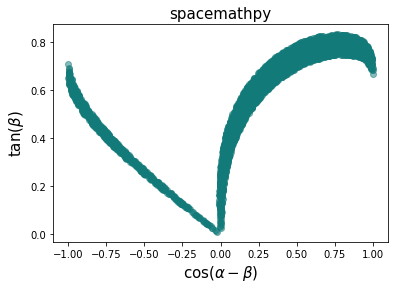

In [22]:
plot_df(data_rb['2s'],colx='Cab',coly='tb',
        latex_names=latex_names)

### $$R_{\gamma}$$

In [23]:
data_rga = Rgamma.parameter_space_pandas([
         ghtt_2hdmI(-np.arccos(Cab) + np.arctan(tb),tb),
         ghbb_2hdmI(-np.arccos(Cab) + np.arctan(tb),tb),
         ghww_2hdmI(np.sqrt(1-Cab**2)),0,mCH
],parameters)

/home/moises/miniconda3/lib/python3.7/site-packages/spacemathpy/RXX.py:164: RuntimeWarning: invalid value encountered in sqrt
  return (1.0/4.0)*(np.log((1+np.sqrt(1-x))/(1-np.sqrt(1-x)))-1j*np.pi)**2; #######MODIFICADO#########(-sp.I*np.pi)
/home/moises/miniconda3/lib/python3.7/site-packages/spacemathpy/RXX.py:211: RuntimeWarning: invalid value encountered in sqrt
  return -(1.0/4)*(np.log((1+np.sqrt(1-x)/(1-np.sqrt(1-x))))-1j*np.pi)**2;#######MODIFICADO#########(-sp.I*sp.pi)


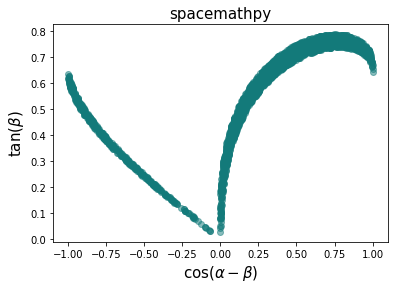

In [24]:
plot_df(data_rga['2s'],colx='Cab',coly='tb',
        latex_names=latex_names)

### $$R_{W}$$

In [25]:
data_rw = Rw.parameter_space_pandas([
         ghtt_2hdmI(-np.arccos(Cab) + np.arctan(tb),tb),
         ghbb_2hdmI(-np.arccos(Cab) + np.arctan(tb),tb),
         ghww_2hdmI(np.sqrt(1-Cab**2))
],parameters)

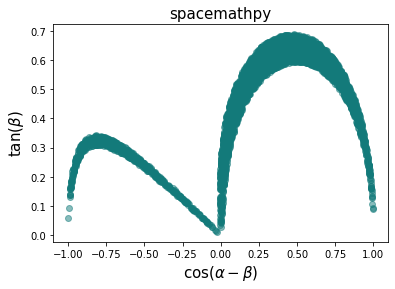

In [26]:
plot_df(data_rw['1s'],colx='Cab',coly='tb',
        latex_names=latex_names)

### $$R_{Z}$$

In [27]:
data_rz = Rz.parameter_space_pandas([
         ghtt_2hdmI(-np.arccos(Cab) + np.arctan(tb),tb),
         ghbb_2hdmI(-np.arccos(Cab) + np.arctan(tb),tb),
         ghzz_2hdmI(np.sqrt(1-Cab**2))
],parameters)

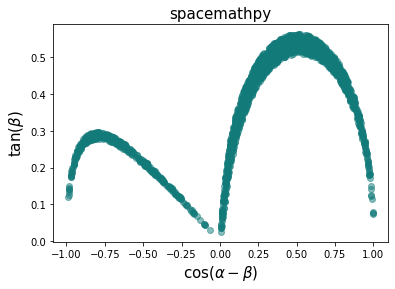

In [28]:
plot_df(data_rz['1s'],colx='Cab',coly='tb',
        latex_names=latex_names)

Using directly matplotlib

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

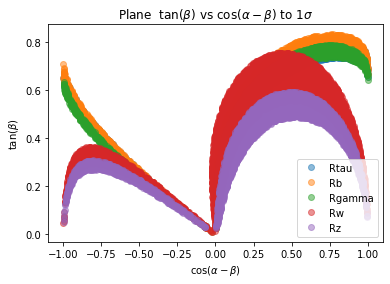

In [30]:
data1s = {'Rtau':data_rtau['2s'],'Rb':data_rb['2s'],'Rgamma':data_rga['2s'],
          'Rw':data_rw['2s'],'Rz':data_rz['2s']}
plt.figure()
for k in data1s.keys():
    plt.plot(data1s[k]['Cab'],data1s[k]['tb'],'o',label=k,alpha=0.5)
plt.xlabel(r'$\cos(\alpha -\beta)$');
plt.ylabel(r'$\tan(\beta)$');
plt.title(r'Plane  $\tan(\beta)$ vs $\cos(\alpha -\beta)$ to 1$\sigma$')
plt.legend();

In [31]:
def intersection_parameters(couplings,parameters,sigma=1):
    '''
    couplings: instance of HiggsSignalStrenght
    sigma: number of sigmas it coulbe 1 or 2
    '''
    if isinstance(couplings,HiggsSignalStrenght):
        from pandas import DataFrame
        global Rtau,Rb,Rgamma,Rw,Rz
        ghtt = couplings.ghtt
        ghbb = couplings.ghbb
        ghtautau = couplings.ghtautau
        ghWW = couplings.ghWW
        ghZZ = couplings.ghZZ
        gCH = couplings.gCH
        mCH = couplings.mCH
        ind_tau = Rtau.np_index(ghtt,ghbb,ghtautau,sigma=sigma)
        ind_b = Rb.np_index(ghtt,ghbb,sigma=sigma)
        ind_gamma = Rgamma.np_index(ghtt,ghbb,ghWW,gCH,mCH,sigma=sigma)
        ind_w = Rw.np_index(ghtt,ghbb,ghWW,sigma=sigma)
        ind_z = Rz.np_index(ghtt,ghbb,ghZZ,sigma=sigma)
        index = ind_tau & ind_b & ind_gamma & ind_w & ind_z
        data = {key:parameters[key][index] 
                  for key in parameters.keys()}
        return [ind_tau,ind_b,ind_gamma,ind_w,ind_z,index]#DataFrame(data)
    else:
        print(f'{couplings} must be an instance of HiggsSignalStrenght')

In [32]:
n = 1000000
Cab = np.random.uniform(-1.0,1.0,n)
tb = np.random.uniform(0.01,1.0,n)
mCH = np.random.uniform(200,1000,n)
parametersI = {'Cab':Cab,'tb':tb}

In [33]:
THDM = HiggsSignalStrenght()
THDM.ghtt = ghtt_2hdmI(np.arccos(Cab) - np.arctan(tb),tb)
THDM.ghbb = ghbb_2hdmI(np.arccos(Cab) - np.arctan(tb),tb)
THDM.ghtautau = ghtautau_2hdmI(np.arccos(Cab) - np.arctan(tb),tb)
THDM.ghWW = ghww_2hdmI(np.sqrt(1-Cab**2))
THDM.ghZZ = ghzz_2hdmI(np.sqrt(1-Cab**2))

In [34]:
valsI = intersection_parameters(THDM,parametersI)
#Rtau.func(THDM.ghtt,THDM.ghbb,THDM.ghtautau)
#np_index(Rtau.func(THDM.ghtt,THDM.ghbb,THDM.ghtautau),
#                          Rtau.R1sd,Rtau.R1su)

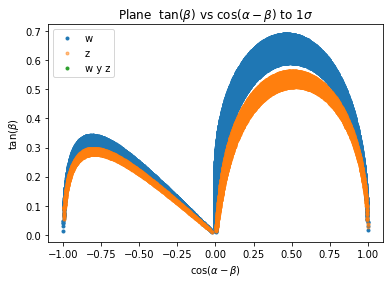

In [35]:
indx = valsI[0]*valsI[1]*valsI[2]*valsI[3]*valsI[4]
indx1 = valsI[3]*valsI[4]
plt.plot(Cab[valsI[3]],tb[valsI[3]],'.',label='w')
plt.plot(Cab[valsI[4]],tb[valsI[4]],'.',label='z',alpha=0.5)
plt.plot(Cab[indx1],tb[indx1],'.',label='w y z')
plt.xlabel(r'$\cos(\alpha -\beta)$');
plt.ylabel(r'$\tan(\beta)$');
plt.title(r'Plane  $\tan(\beta)$ vs $\cos(\alpha -\beta)$ to 1$\sigma$')
plt.legend();

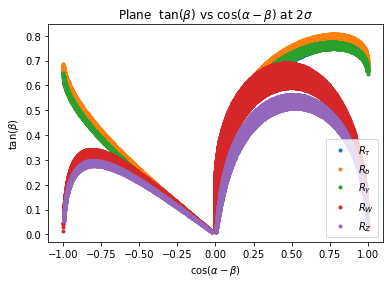

In [38]:
#indx = valsI[0]*valsI[1]*valsI[2]*valsI[3]*valsI[4]
Rs_name = [fr'$R_{i}$' for i in [r'\tau','b',r'\gamma','W','Z']] 
indx1 = valsI[2]#*valsI[1]*valsI[2]#*valsI[3]
for i in range(5):
    plt.plot(Cab[valsI[i]],tb[valsI[i]],'.',label=Rs_name[i])
plt.xlabel(r'$\cos(\alpha -\beta)$');
plt.ylabel(r'$\tan(\beta)$');
plt.title(r'Plane  $\tan(\beta)$ vs $\cos(\alpha -\beta)$ at 2$\sigma$')
plt.legend(loc='best');

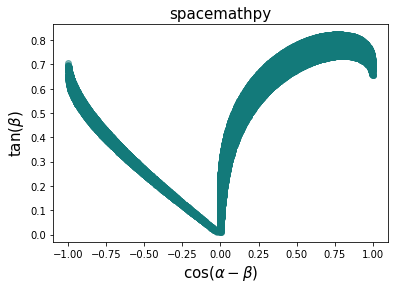

In [48]:
data_rtauI = Rtau.parameter_space_pandas([
         ghtt_2hdmI(-np.arccos(Cab) + np.arctan(tb),tb),
         ghbb_2hdmI(-np.arccos(Cab) + np.arctan(tb),tb),
         ghtautau_2hdmI(-np.arccos(Cab) + np.arctan(tb),tb)
],parametersI)
plot_df(data_rtauI['2s'],colx='Cab',coly='tb',
        latex_names=latex_names)

In [49]:
n = 1000
Cab = np.linspace(0.99,1.0,n)
tb = np.linspace(0.1,0.3,n)
mCH = np.linspace(200,1000,n)

In [50]:
n = 10000
Cab = np.random.uniform(-1.0,1.0,n)
tb = np.random.uniform(0.01,15.0,n)
mCH = np.random.uniform(200,1000,n)

In [51]:
def conditionRx(R,*args,sigma=1):
    if sigma==1:
        return R.R1sd < R.func(*args) < R.R1su
    elif sigma==2:
        return R.R2sd < R.func(*args) < R.R2su
    else:
        print('sigma only can be 1 or 2')

In [52]:
THDMI = HiggsSignalStrenght()

In [53]:
zeros = []
for i in range(n):
    cos = Cab[i]
    tan = tb[i]
    MCH = 200#mCH[i]
    THDMI.ghtt = ghtt_2hdmI(-np.arccos(cos) + np.arctan(tan),tan)
    THDMI.ghbb = ghbb_2hdmI(-np.arccos(cos) + np.arctan(tan),tan)
    THDMI.ghtautau = ghtautau_2hdmI(-np.arccos(cos) + np.arctan(tan),tan)
    THDMI.ghWW = ghww_2hdmI(np.sqrt(1-cos**2))
    THDMI.ghZZ = ghzz_2hdmI(np.sqrt(1-cos**2))
    if (conditionRx(Rtau,THDMI.ghtt,THDMI.ghbb,THDMI.ghtautau,sigma=2) and 
        conditionRx(Rb,THDMI.ghtt,THDMI.ghbb,sigma=2) and 
       conditionRx(Rgamma,THDMI.ghtt,THDMI.ghbb,THDMI.ghWW,0,MCH,sigma=2) and
       conditionRx(Rw,THDMI.ghtt,THDMI.ghbb,THDMI.ghWW,sigma=2) and
       conditionRx(Rz,THDMI.ghtt,THDMI.ghbb,THDMI.ghZZ,sigma=2)):
        zeros.append([cos,tan])
ps = np.array(zeros)

KeyboardInterrupt: 

In [ ]:
ps
#plt.plot(ps[:,0],ps[:,1],'o')